In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yahooFinance

%matplotlib inline

In [2]:
start_date = datetime(datetime.now().year - 1,datetime.now().month,datetime.now().day)
end_date = datetime.now()

stock_list = ['META', 'TSLA', 'NVDA' , 'AMZN', 'AAPL']
stock_data = {}

for stocks in stock_list:
    stock_data[stocks] = yahooFinance.download(stocks,start_date,end_date)
    


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
stock_data

{'META':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2023-05-22  245.410004  253.570007  245.119995  248.320007  248.056808   
 2023-05-23  246.809998  251.610001  246.649994  246.740005  246.478485   
 2023-05-24  245.279999  249.589996  244.949997  249.210007  248.945877   
 2023-05-25  253.399994  255.619995  249.169998  252.690002  252.422180   
 2023-05-26  252.929993  262.309998  252.710007  262.040009  261.762268   
 ...                ...         ...         ...         ...         ...   
 2024-05-16  475.000000  477.690002  472.750000  473.230011  473.230011   
 2024-05-17  470.829987  472.799988  468.420013  471.910004  471.910004   
 2024-05-20  469.950012  473.200012  467.040009  468.839996  468.839996   
 2024-05-21  467.119995  470.700012  462.269989  464.630005  464.630005   
 2024-05-22  467.899994  473.719910  465.649994  467.779999  467.779999   
 
               

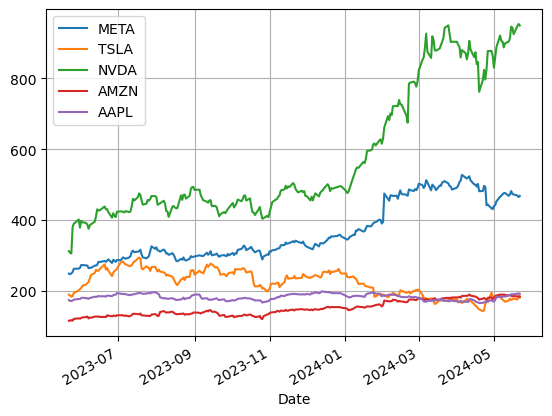

In [4]:
fig,ax = plt.subplots()

for stocks,data in stock_data.items():
    data['Adj Close'].plot(legend=True,label=stocks,ax=ax,)
ax.legend()
ax.grid(True)
plt.show()

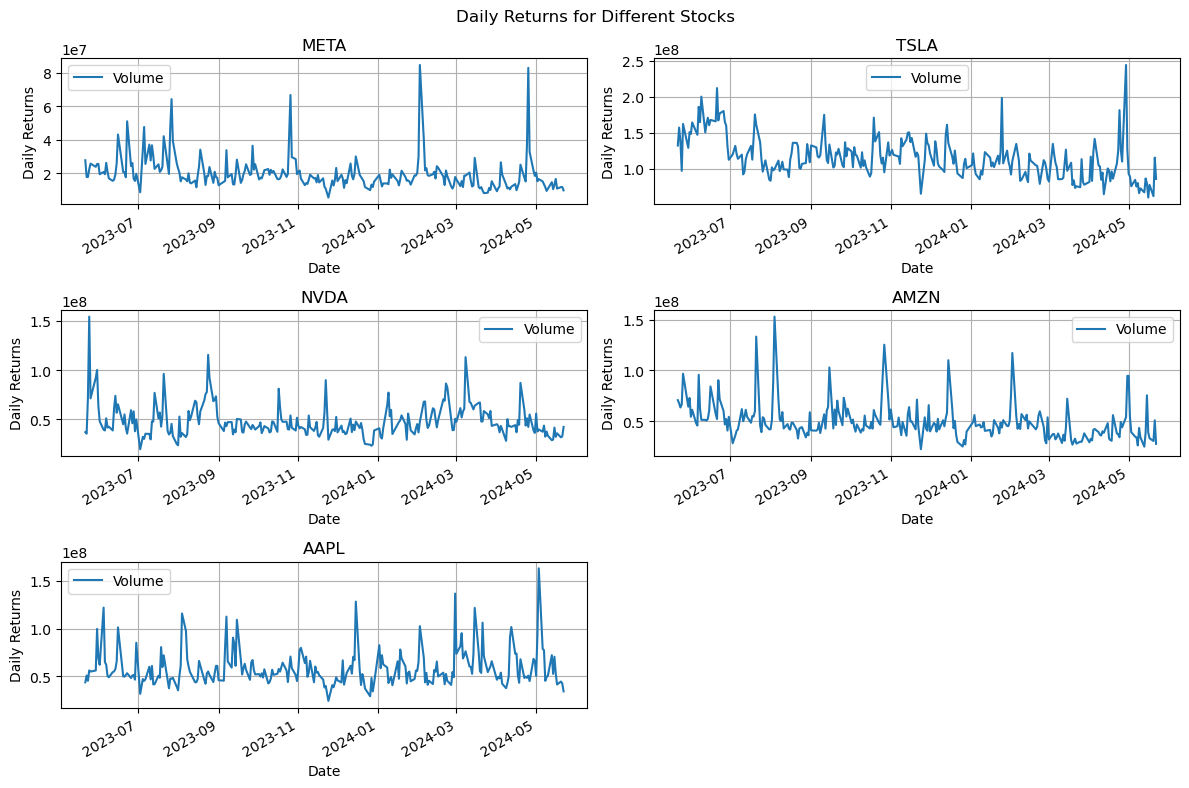

In [5]:
num_stocks = len(stock_data)
num_rows = (num_stocks + 1) // 2  # Ensure an even number of rows
num_cols = 2


fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.suptitle('Daily Returns for Different Stocks')


axes = axes.flatten()


for i, (ticker, data) in enumerate(stock_data.items()):
    ax = axes[i]
    data['Volume'].plot(ax=ax, legend=True)
    ax.set_title(ticker)
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Returns')
    ax.grid(True)

for i in range(num_stocks, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

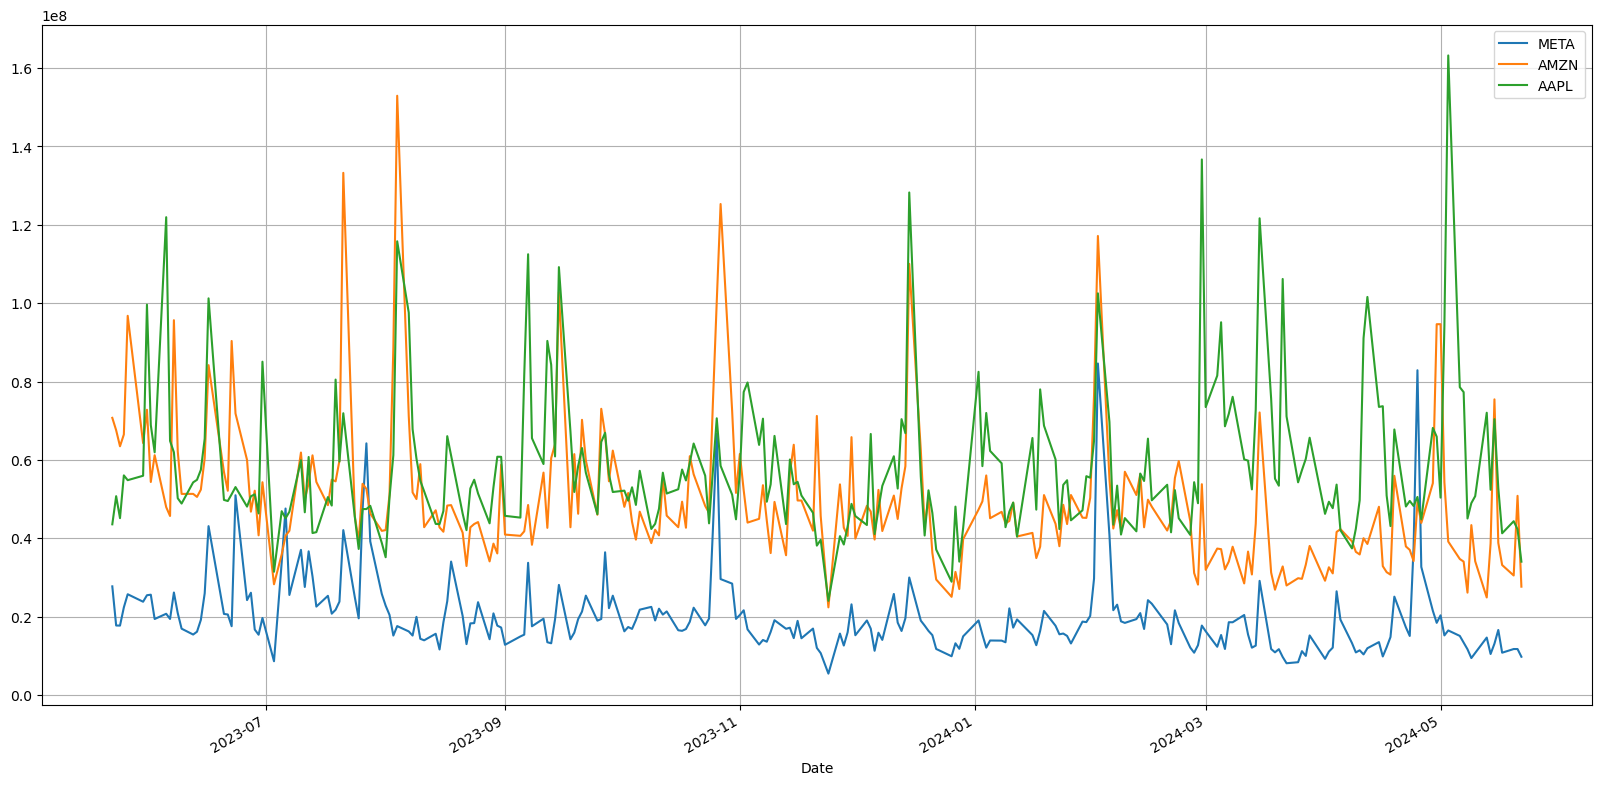

In [6]:
fig,ax = plt.subplots()
for stocks,data in stock_data.items():
    if stocks not in ['TSLA','NVDA']:
        data['Volume'].plot(legend=True,label=stocks,ax=ax,figsize=(20,10))
ax.legend()
ax.grid(True)
plt.show()

Moving Averages

In [7]:
ma_days = [20,45,60]

for stocks,data in stock_data.items():
    for ma in ma_days:
        col_name = "MA for %s Days" %(str(ma))
        stock_data[stocks][col_name] = data['Adj Close'].rolling(ma).mean()

In [8]:
stock_data['NVDA']

,Open,High,Low,Close,Adj Close,Volume,MA for 20 Days,MA for 45 Days,MA for 60 Days
Date,,,,,,,,,
2023-05-22,309.010010,315.200012,306.799988,311.760010,311.660065,37200000,NaN,NaN,NaN
2023-05-23,310.000000,312.880005,306.309998,306.880005,306.781586,35625300,NaN,NaN,NaN
2023-05-24,302.100006,306.070007,298.059998,305.380005,305.282104,72141900,NaN,NaN,NaN
2023-05-25,385.230011,394.799988,366.350006,379.799988,379.678192,154391100,NaN,NaN,NaN
2023-05-26,378.899994,391.700012,375.500000,389.459991,389.335083,71439700,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-05-16,949.099976,958.190002,941.030029,943.590027,943.590027,32395200,871.232999,880.779332,871.058666
2024-05-17,943.690002,947.400024,918.059998,924.789978,924.789978,35969100,879.372498,881.787109,873.382780
2024-05-20,937.500000,952.000000,934.400024,947.799988,947.799988,31876400,887.003497,883.329998,876.043896


<Axes: xlabel='Date'>

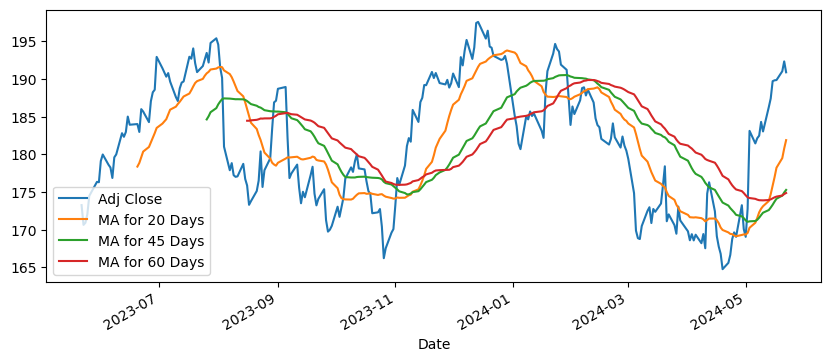

In [9]:
stock_data['AAPL'][['Adj Close','MA for 20 Days','MA for 45 Days','MA for 60 Days']].plot(subplots=False,figsize=(10,4))

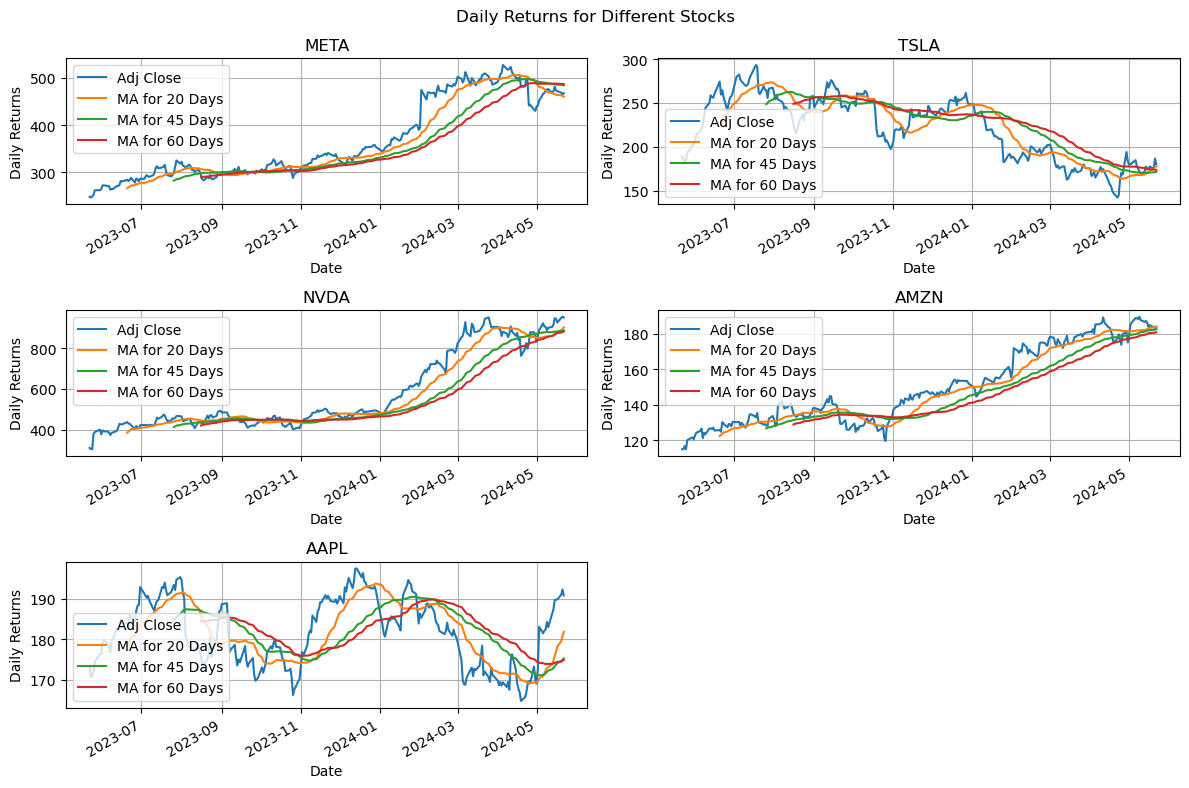

In [10]:
num_stocks = len(stock_data)
num_rows = (num_stocks + 1) // 2  # Ensure an even number of rows
num_cols = 2


fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.suptitle('Daily Returns for Different Stocks')


axes = axes.flatten()


for i, (ticker, data) in enumerate(stock_data.items()):
    ax = axes[i]
    data[['Adj Close','MA for 20 Days','MA for 45 Days','MA for 60 Days']].plot(ax=ax, legend=True)
    ax.set_title(ticker)
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Returns')
    ax.grid(True)

for i in range(num_stocks, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Percent Change

In [11]:
for stocks,data in stock_data.items():
    stock_data[stocks]['Daily_Returns'] = data['Adj Close'].pct_change()

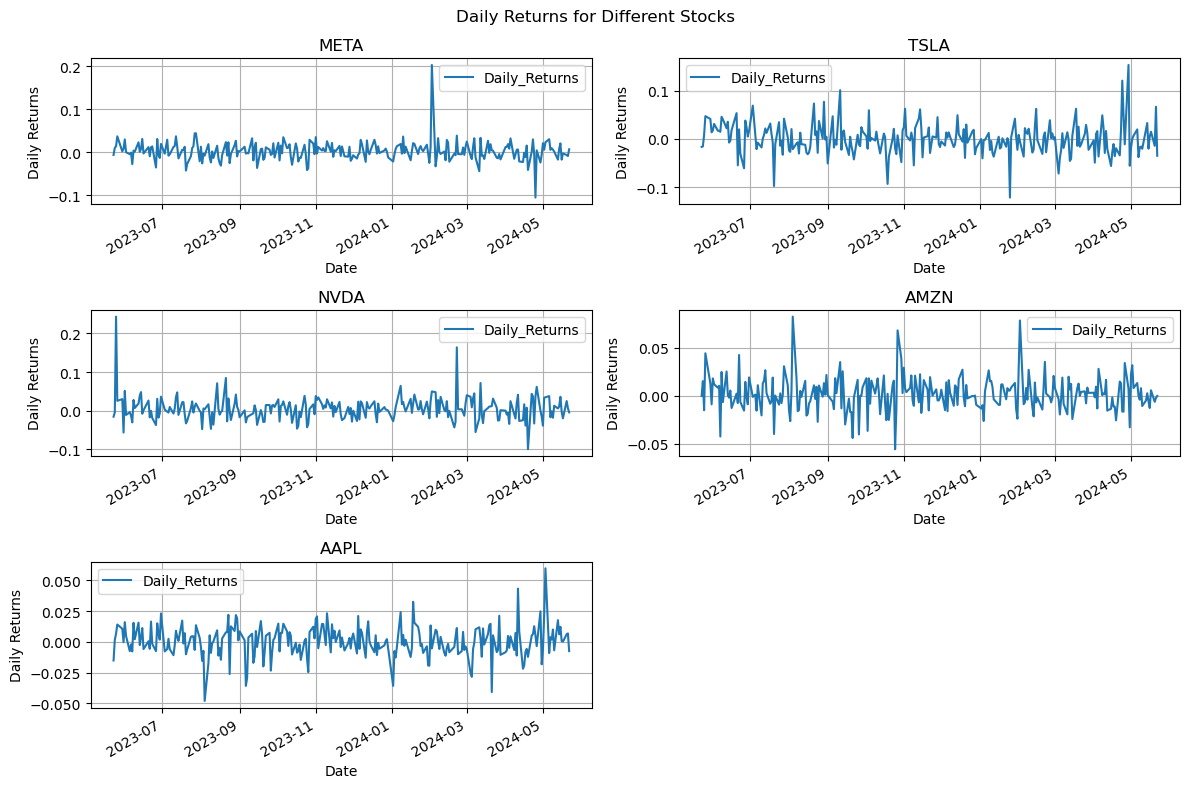

In [12]:
num_stocks = len(stock_data)
num_rows = (num_stocks + 1) // 2  # Ensure an even number of rows
num_cols = 2


fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.suptitle('Daily Returns for Different Stocks')


axes = axes.flatten()


for i, (ticker, data) in enumerate(stock_data.items()):
    ax = axes[i]
    data['Daily_Returns'].plot(ax=ax, legend=True)
    ax.set_title(ticker)
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Returns')
    ax.grid(True)

for i in range(num_stocks, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

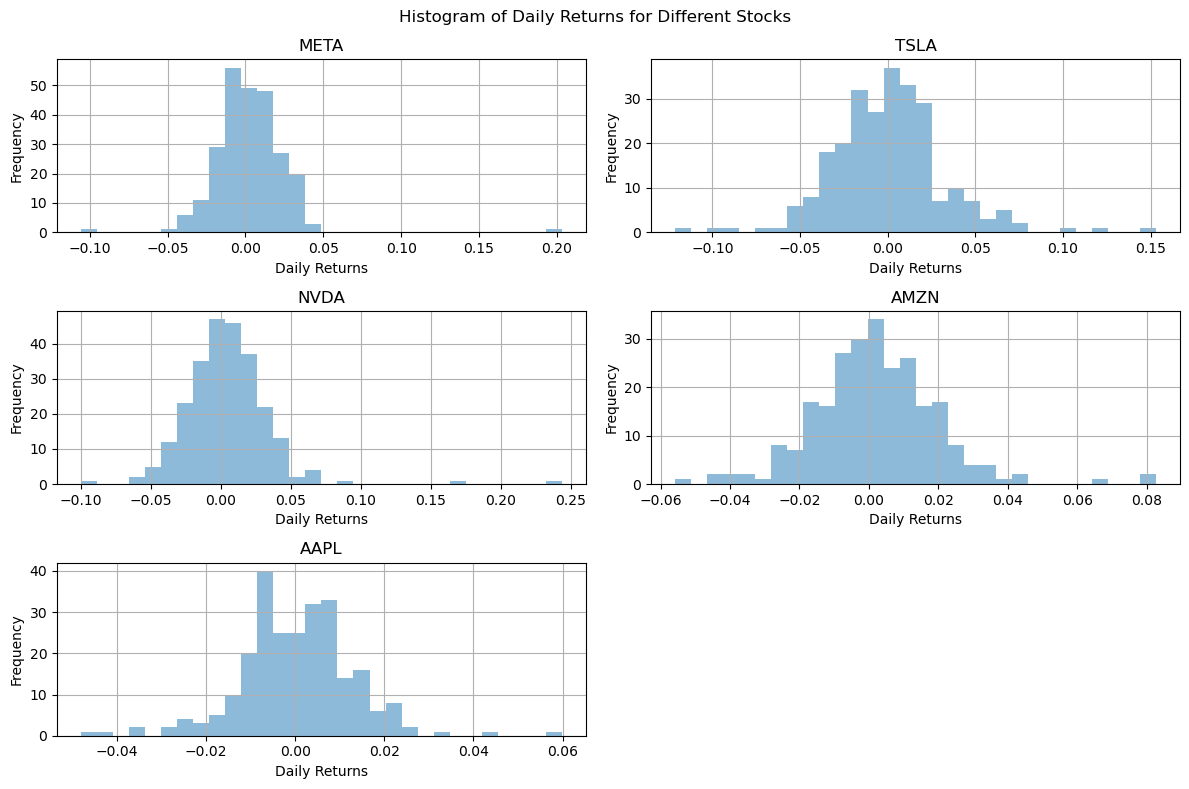

In [13]:
num_stocks = len(stock_data)
num_rows = (num_stocks + 1) // 2  # Ensure an even number of rows
num_cols = 2


fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.suptitle('Histogram of Daily Returns for Different Stocks')


axes = axes.flatten()


for i, (ticker, data) in enumerate(stock_data.items()):
    ax = axes[i]
    data['Daily_Returns'].plot.hist(ax=ax, bins=30, alpha=0.5)
    ax.set_title(ticker)
    ax.set_xlabel('Daily Returns')
    ax.set_ylabel('Frequency')
    ax.grid(True)


for i in range(num_stocks, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [14]:
closing_price=pd.DataFrame()
for stocks,data in stock_data.items():
    print(stocks)
    closing_price[stocks] = pd.DataFrame(data['Adj Close'])

META
TSLA
NVDA
AMZN
AAPL


In [15]:
price_rets = closing_price.pct_change()
price_rets.dropna(inplace=True)

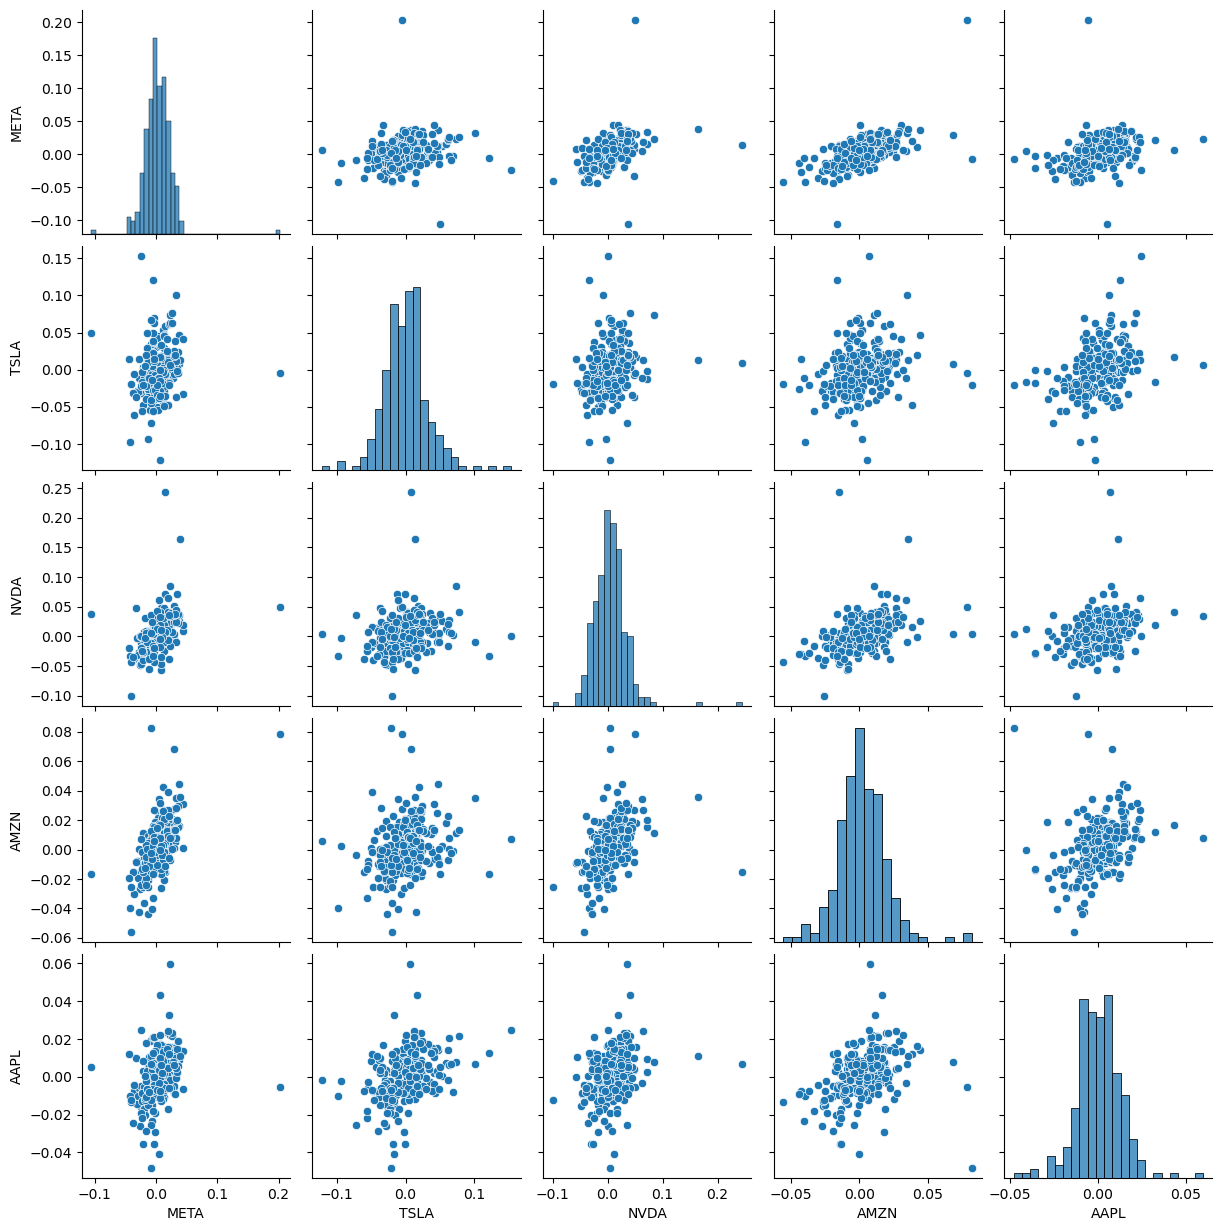

In [16]:
sns.pairplot(price_rets)

<Axes: >

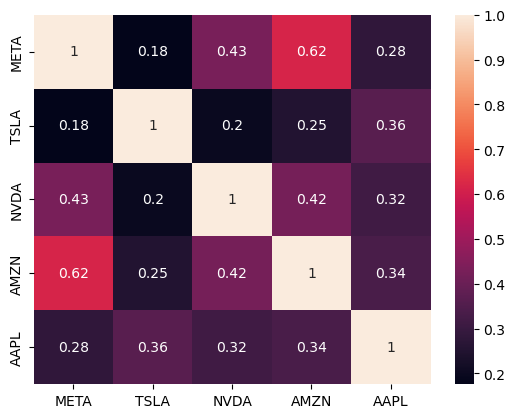

In [17]:
sns.heatmap(price_rets.corr().dropna(),annot=True,cmap='rocket')

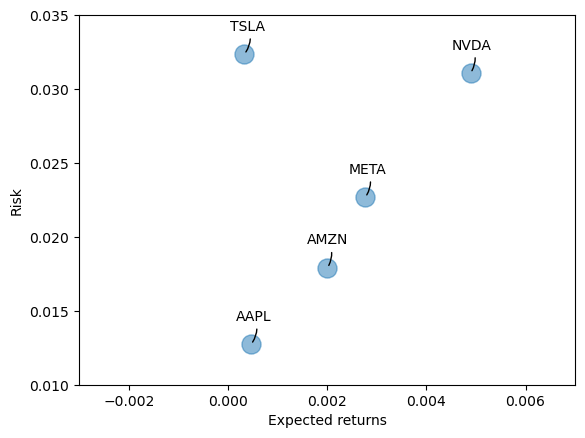

In [18]:
area = np.pi*60

plt.scatter(price_rets.mean(), price_rets.std(),alpha = 0.5,s =area)


plt.ylim([0.01,0.035])
plt.xlim([-0.003,0.0070])


plt.xlabel('Expected returns')
plt.ylabel('Risk')


for label, x, y in zip(price_rets.columns, price_rets.mean(), price_rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (15, 15),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


In [19]:

days = 365


dt = 1/days


mu = price_rets.mean()['META']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = price_rets.std()['META']

In [20]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for META')

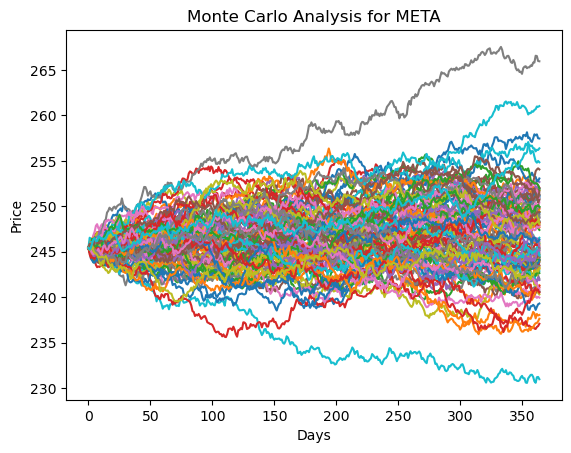

In [21]:
start_price = stock_data['META']['Open'][0]
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for META')

In [22]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];


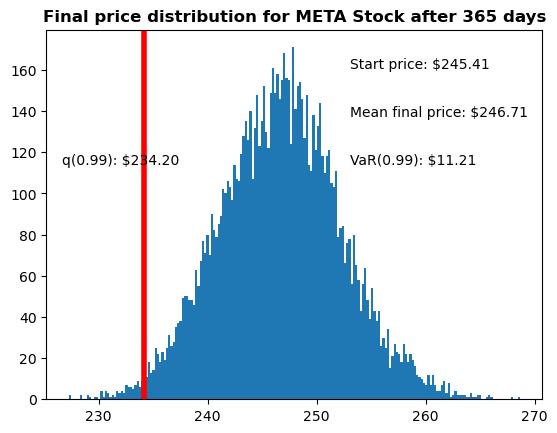

In [23]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    

plt.hist(simulations,bins=200)



plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())


plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))


plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)


plt.axvline(x=q, linewidth=4, color='r')


plt.title(u"Final price distribution for META Stock after %s days" % days, weight='bold');

Check if models will recommend buying
1. META - Med Risk - Med Reward
2. NVDA - High Risk - High Reward

In [24]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from xgboost import XGBClassifier 
from sklearn import metrics 

In [33]:
start_date = datetime(datetime.now().year - 8,datetime.now().month,datetime.now().day)
end_date = datetime.now()



META = pd.DataFrame(yahooFinance.download('META',start_date,end_date),)
NVDA = pd.DataFrame(yahooFinance.download('NVDA',start_date,end_date))
META.reset_index(inplace=True)
NVDA.reset_index(inplace=True)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [35]:
META['Year'] = META['Date'].dt.year
META['Month'] = META['Date'].dt.month
META['Day'] = META['Date'].dt.day

NVDA['Year'] = NVDA['Date'].dt.year
NVDA['Month'] = NVDA['Date'].dt.month
NVDA['Day'] = NVDA['Date'].dt.day

In [36]:
META

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2016-05-23,117.419998,117.599998,115.940002,115.970001,115.847084,20441000,2016,5,23
1,2016-05-24,116.239998,117.730003,116.120003,117.699997,117.575249,20183600,2016,5,24
2,2016-05-25,118.129997,118.669998,117.379997,117.889999,117.765053,20019800,2016,5,25
3,2016-05-26,118.239998,119.760002,117.919998,119.470001,119.343376,18481300,2016,5,26
4,2016-05-27,119.559998,119.849998,119.010002,119.379997,119.253471,13493600,2016,5,27
...,...,...,...,...,...,...,...,...,...,...
2009,2024-05-16,475.000000,477.690002,472.750000,473.230011,473.230011,16608200,2024,5,16
2010,2024-05-17,470.829987,472.799988,468.420013,471.910004,471.910004,10807300,2024,5,17
2011,2024-05-20,469.950012,473.200012,467.040009,468.839996,468.839996,11745100,2024,5,20
2012,2024-05-21,467.119995,470.700012,462.269989,464.630005,464.630005,11742200,2024,5,21


In [37]:
META['Is_Qtr_End'] = np.where(META['Month']%3==0,1,0)
NVDA['Is_Qtr_End'] = np.where(NVDA['Month']%3==0,1,0)

C:\Users\user\AppData\Local\Temp\ipykernel_9384\2029240939.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = META.groupby('Year').mean()
C:\Users\user\AppData\Local\Temp\ipykernel_9384\2029240939.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


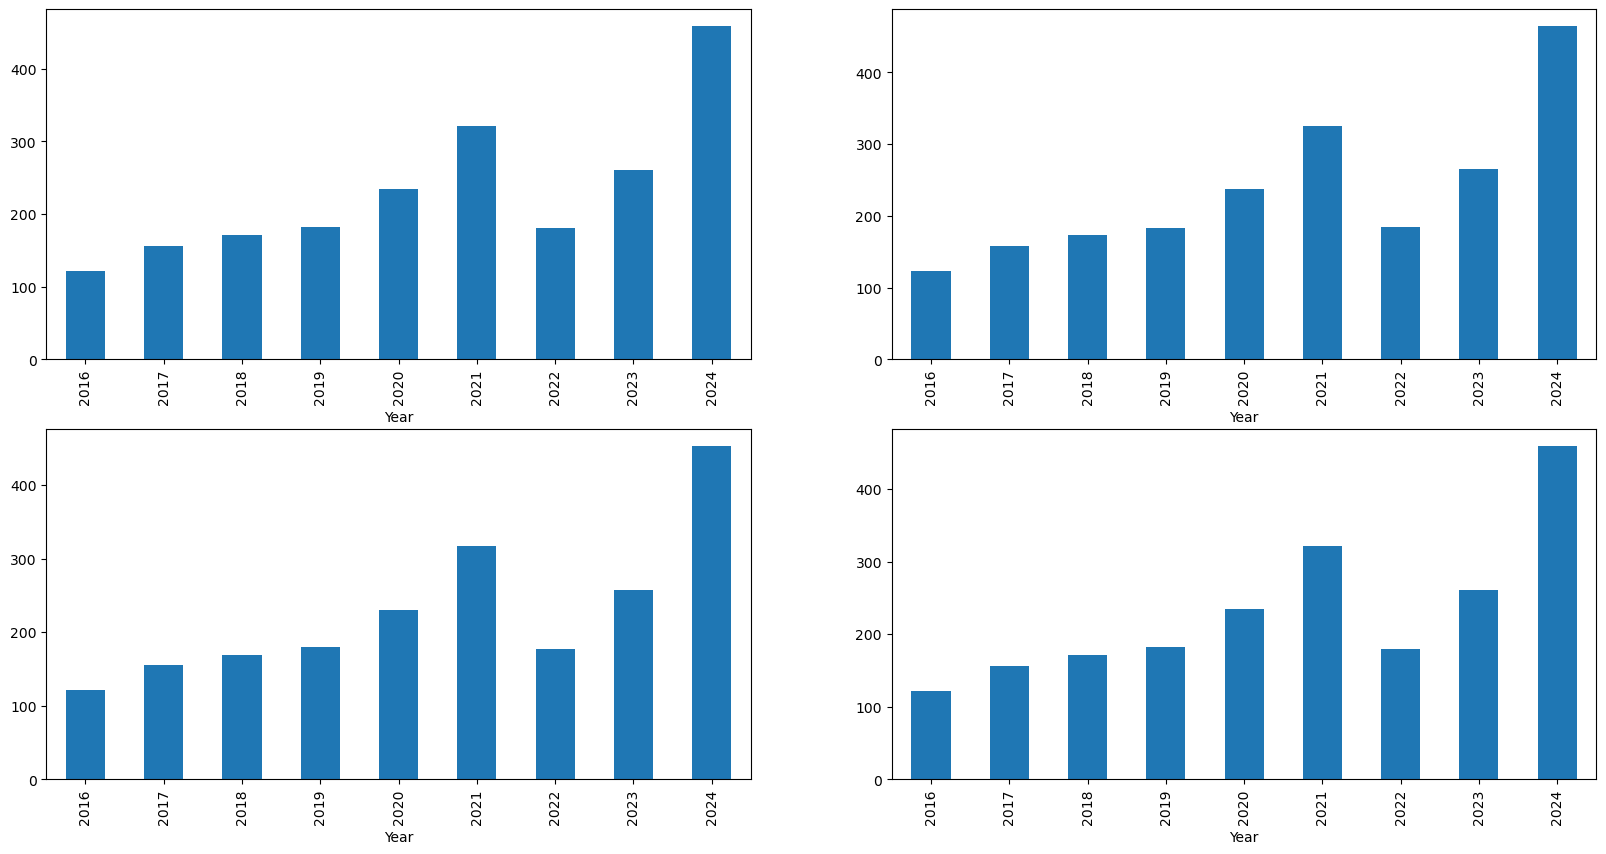

In [39]:
data_grouped = META.groupby('Year').mean() 
plt.subplots(figsize=(20,10)) 
  
for i, col in enumerate(['Open', 'High', 'Low', 'Close']): 
  plt.subplot(2,2,i+1) 
  data_grouped[col].plot.bar() 
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9384\3807089202.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = NVDA.groupby('Year').mean()
C:\Users\user\AppData\Local\Temp\ipykernel_9384\3807089202.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


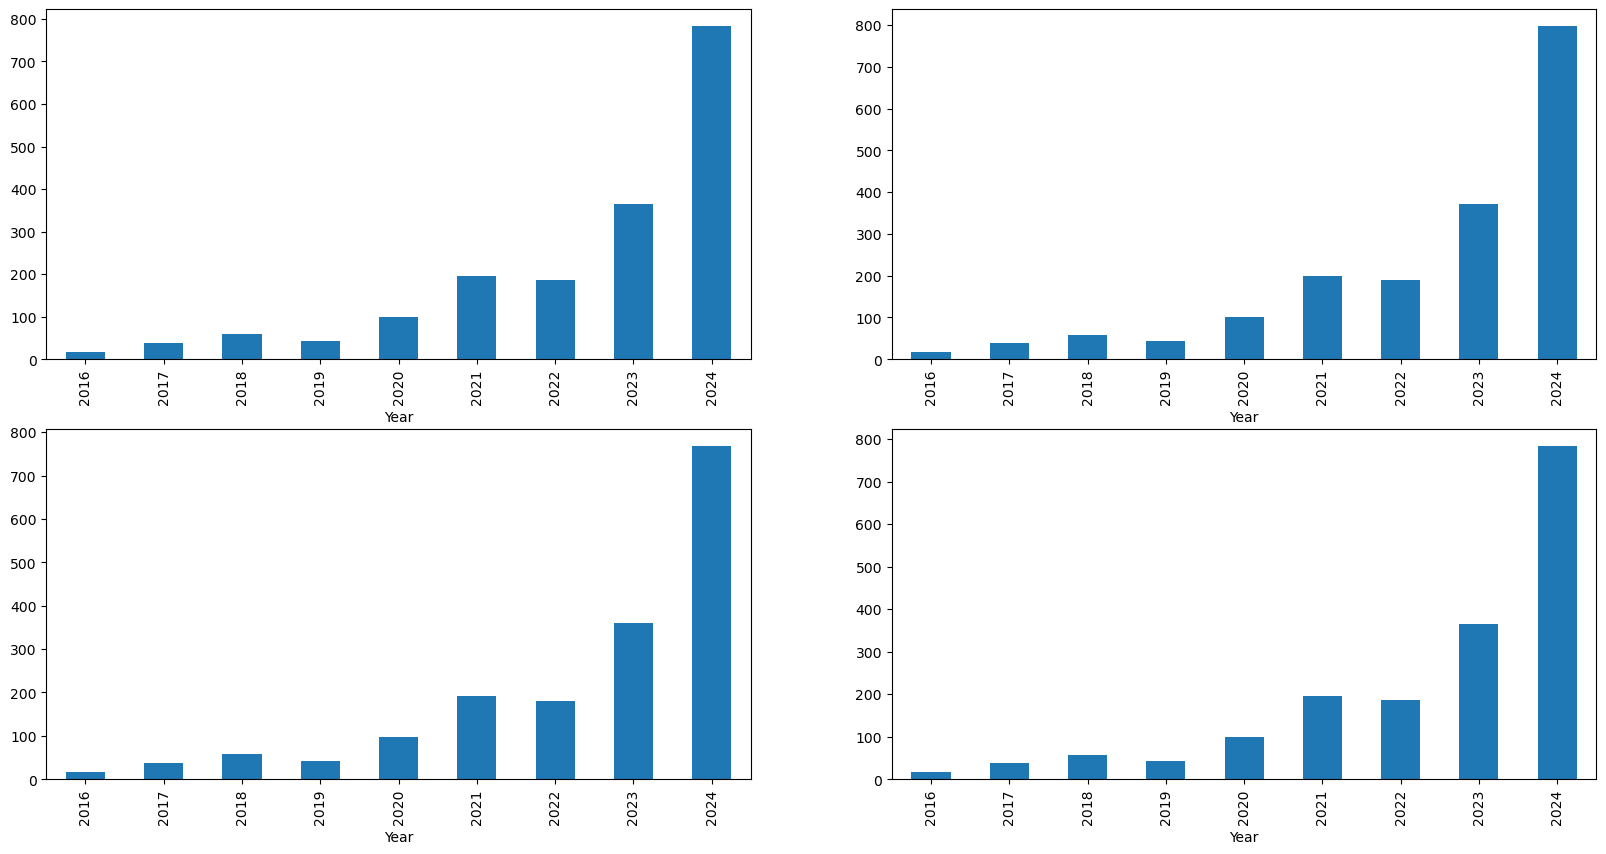

In [40]:
data_grouped = NVDA.groupby('Year').mean() 
plt.subplots(figsize=(20,10)) 
  
for i, col in enumerate(['Open', 'High', 'Low', 'Close']): 
  plt.subplot(2,2,i+1) 
  data_grouped[col].plot.bar() 
plt.show()

In [42]:
META.groupby('Is_Qtr_End').mean()

C:\Users\user\AppData\Local\Temp\ipykernel_9384\4081798829.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  META.groupby('Is_Qtr_End').mean()


,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
Is_Qtr_End,,,,,,,,,
0,222.100366,224.993587,219.440276,222.300673,222.082217,2.283277e+07,2019.950673,6.09716,15.699552
1,215.894985,218.730104,213.048077,215.917381,215.704140,2.217348e+07,2019.761834,7.41568,15.818047


In [43]:
NVDA.groupby('Is_Qtr_End').mean()

C:\Users\user\AppData\Local\Temp\ipykernel_9384\1610616041.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NVDA.groupby('Is_Qtr_End').mean()


,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
Is_Qtr_End,,,,,,,,,
0,165.389535,168.418075,162.299026,165.554228,165.258102,4.984623e+07,2019.950673,6.09716,15.699552
1,156.766608,159.530285,153.722352,156.732300,156.449848,5.129576e+07,2019.761834,7.41568,15.818047


In [45]:
META['open-close']  = META['Open'] - META['Close'] 
META['low-high']  = META['Low'] - META['High'] 
META['target'] = np.where(META['Close'].shift(-1) > META['Close'], 1, 0)

NVDA['open-close']  = NVDA['Open'] - NVDA['Close'] 
NVDA['low-high']  = NVDA['Low'] - NVDA['High'] 
NVDA['target'] = np.where(NVDA['Close'].shift(-1) > NVDA['Close'], 1, 0)

In [49]:
features = META[['open-close', 'low-high', 'Is_Qtr_End']] 
target = META['target'] 
  
scaler = StandardScaler() 
features = scaler.fit_transform(features) 
  
X_train_M, X_valid_M, Y_train_M, Y_valid_M = train_test_split( 
    features, target, test_size=0.1, random_state=2022) 
print(X_train.shape, X_valid.shape)

(1812, 3) (202, 3)


In [50]:
features = NVDA[['open-close', 'low-high', 'Is_Qtr_End']] 
target = NVDA['target'] 
  
scaler = StandardScaler() 
features = scaler.fit_transform(features) 
  
X_train_N, X_valid_N, Y_train_N, Y_valid_N = train_test_split( 
    features, target, test_size=0.1, random_state=2022) 
print(X_train.shape, X_valid.shape)

(1812, 3) (202, 3)


In [51]:
models = [LogisticRegression(), SVC( 
  kernel='poly', probability=True), XGBClassifier()] 
  
for i in range(3): 
  models[i].fit(X_train_M, Y_train_M) 
  
  print(f'{models[i]} : ') 
  print('Training Accuracy : ', metrics.roc_auc_score( 
    Y_train, models[i].predict_proba(X_train_M)[:,1])) 
  print('Validation Accuracy : ', metrics.roc_auc_score( 
    Y_valid, models[i].predict_proba(X_valid_M)[:,1])) 
  print()

LogisticRegression() : 
Training Accuracy :  0.5051766269793979
Validation Accuracy :  0.500691699604743

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5201247747089184
Validation Accuracy :  0.49016798418972335

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accura

In [55]:
for i in range(3): 
  models[i].fit(X_train_N, Y_train_N) 
  
  print(f'{models[i]} : ') 
  print('Training Accuracy : ', metrics.roc_auc_score( 
    Y_train, models[i].predict_proba(X_train_N)[:,1])) 
  print('Validation Accuracy : ', metrics.roc_auc_score( 
    Y_valid, models[i].predict_proba(X_valid_N)[:,1])) 
  print()

LogisticRegression() : 
Training Accuracy :  0.506623895659054
Validation Accuracy :  0.5319169960474309

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4600508386909713
Validation Accuracy :  0.5012845849802371

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accurac